In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
file = pd.read_csv("data.csv")
columns = file.columns[8:15]
time_labels = [0, 995, 4844, 8757, 12635, 16102, 19470]
time_check = 19470
y_limit = .665
train, test = train_test_split(file, test_size=0.2, random_state=42)

In [40]:
# file.info()

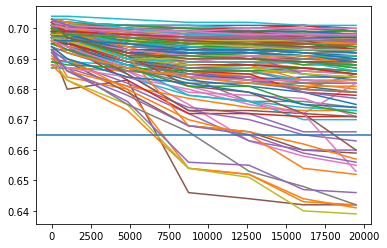

In [41]:
for i in range(file.shape[0]):
    data_part = file[columns].iloc[i]
    data_part = np.array(data_part)
    plt.plot(time_labels, data_part)
plt.axhline(y=y_limit, xmin=0, xmax=1)

In [42]:
mean = []
std = []
for i in range(8, 15):
    data = np.array(train[train.columns[i]])
    # print(train.columns[i])
    # print(data)
    mean.append(data.mean())
    std.append(data.std())

In [43]:
print(mean)
print(std)

[0.6980902255639098, 0.6963007518796993, 0.6930225563909774, 0.6895338345864661, 0.688593984962406, 0.6871503759398495, 0.6861353383458647]
[0.0034476943295081203, 0.0044805091050785515, 0.006411298960984462, 0.010914947240636153, 0.0119453880073604, 0.013830062189282458, 0.014478286544909196]


In [44]:
mean = np.array(mean)
std = np.array(std)
time_labels_np = np.array(time_labels).reshape(-1, 1)
# print(time_labels)
# print(time_labels_np)

[0.69664023 0.69604367 0.69373593 0.69138983 0.68906471 0.68698602
 0.68496668]


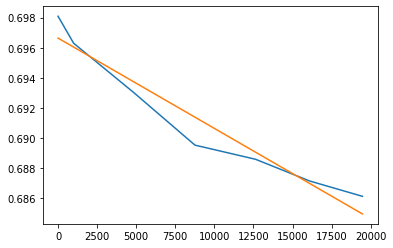

In [45]:
model_mean = LinearRegression()
model_mean.fit(time_labels_np, mean)
mean_coef = model_mean.coef_[0]
predict_values = model_mean.predict(time_labels_np)
plt.plot(time_labels, mean)
plt.plot(time_labels, predict_values)
print(predict_values)
# predict_values_2 = [mean[0] + mean_coef * i for i in time_labels]
# plt.plot(time_labels, predict_values_2)
# print(predict_values[6] - predict_values[0])

[0.00404273 0.00463224 0.00691267 0.00923102 0.01152863 0.01358273
 0.01557818]


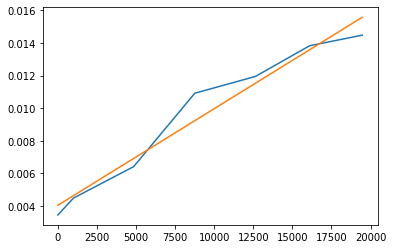

In [46]:
model_std = LinearRegression()
model_std.fit(time_labels_np, std)
std_coef = model_std.coef_[0]
predict_values = model_std.predict(time_labels_np)
plt.plot(time_labels, std)
plt.plot(time_labels, predict_values)
print(predict_values)

In [47]:
mean_test_time0 = test[columns[0]].mean()
std_test_time0 = test[columns[0]].std()
print(mean_test_time0, std_test_time0)
mean_test = mean_test_time0 + mean_coef * time_check
std_test = std_test_time0 + std_coef * time_check

0.6980588235294117 0.003575515868443342


In [48]:
non_working = 0
for i in test[columns[6]]:
    if i < y_limit:
        non_working += 1
test_non_working = non_working / test.shape[0]

In [49]:
print("Реальное значение:", test_non_working)
print("Прогноз:", sps.norm(loc=mean_test, scale=std_test).cdf(y_limit))

Реальное значение: 0.029411764705882353
Прогноз: 0.07850275657474598


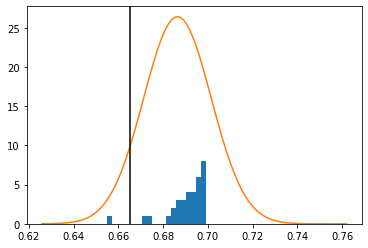

In [50]:
plt.hist(test[columns[6]], bins=20)
x = np.linspace(mean_test - 4 * std_test, mean_test + 5 * std_test, 100)
plt.plot(x, sps.norm(loc=mean_test, scale=std_test).pdf(x))
plt.axvline(y_limit, 0, 1, color='k')